<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**напишіть функцію гіпотези лінійної регресії у векторному вигляді;**

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X, w):
    return np.dot(X, w)


**створіть функцію для обчислення функції втрат у векторному вигляді;**

In [27]:
def compute_loss(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

**реалізуйте один крок градієнтного спуску;**

In [28]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1/m) * np.dot(X.T, (predictions - y))
    w = w - learning_rate * gradient
    return w

In [29]:
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return (X - means) / stds

**знайдіть найкращі параметри 𝑤⃗w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;**

In [30]:
# Приклад датасету (площа, кількість ванних кімнат, кількість спалень, ціна)
X = np.array([
    [2104, 3, 3],
    [1600, 3, 2],
    [2400, 3, 3],
    [1416, 2, 2],
    [3000, 4, 4]
])
y = np.array([399900, 329900, 369000, 232000, 539900])


# Нормалізуємо характеристики
X_normalized = normalize_features(X)

# Додамо стовпець одиниць для інтерсепту
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

# Ініціалізація параметрів
w = np.zeros(X_normalized.shape[1])

# Налаштування параметрів градієнтного спуску
learning_rate = 0.01
num_iterations = 1000
losses = []

# Градієнтний спуск
for i in range(num_iterations):
    w = gradient_descent_step(X_normalized, y, w, learning_rate)
    loss = compute_loss(X_normalized, y, w)
    losses.append(loss)

print("Параметри, знайдені градієнтним спуском:", w)


Параметри, знайдені градієнтним спуском: [374123.84790949  13827.03031773  57848.14577613  31167.43560809]


**знайдіть ці ж параметри за допомогою аналітичного рішення;**

In [31]:
def analytical_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Для аналітичного рішення потрібно також нормалізувати дані
X_analytical = np.hstack((np.ones((X.shape[0], 1)), X))
w_analytical = analytical_solution(X_analytical, y)
print("Параметри, знайдені аналітичним рішенням:", w_analytical)


Параметри, знайдені аналітичним рішенням: [-9.14568206e+04 -1.01416579e+02  1.15079486e+05  1.19192445e+05]


Text(0.5, 1.0, 'Градієнтний спуск - Втрата на кожній ітерації')

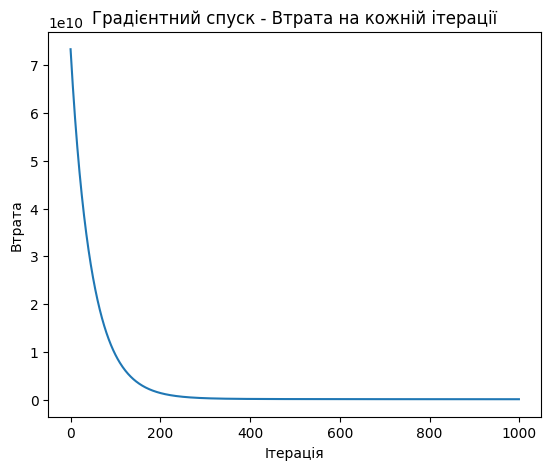

In [32]:
plt.figure(figsize=(14, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Ітерація')
plt.ylabel('Втрата')
plt.title('Градієнтний спуск - Втрата на кожній ітерації')

**порівняйте отримані результати.**

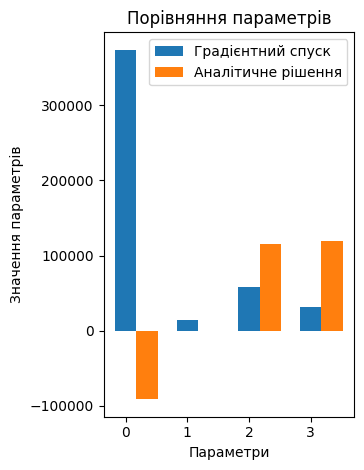

In [33]:
# Порівняння параметрів
plt.subplot(1, 2, 2)
bar_width = 0.35
index = np.arange(len(w))
plt.bar(index, w, bar_width, label='Градієнтний спуск')
plt.bar(index + bar_width, w_analytical, bar_width, label='Аналітичне рішення')
plt.xlabel('Параметри')
plt.ylabel('Значення параметрів')
plt.title('Порівняння параметрів')
plt.legend()

plt.tight_layout()
plt.show()